## Plant Disease Prediction


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset



## Importing libraries


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
import keras
from keras.models import Sequential, 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

print(keras.__version__)


2.15.0


In [6]:
import os
from tensorflow import keras
from tensorflow.keras.models import load_model
import json


## Data Preprocessing


## Training Image preprocessing


In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35264 files belonging to 19 classes.


## Validation Image Preprocessing


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8815 files belonging to 19 classes.


## Building Model


In [102]:
model = Sequential()

## Building Convolution Layer


In [103]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [104]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [105]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [106]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [107]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [108]:
model.add(Dropout(0.25))


In [109]:
model.add(Flatten())


In [110]:
model.add(Dense(units=1500,activation='relu'))


In [111]:
model.add(Dropout(0.4)) #To avoid overfitting


In [112]:
#Output Layer
model.add(Dense(units=19,activation='softmax'))

## Compiling and Training Phase


In [113]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_53 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_55 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

In [115]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
1102/1102 [==============================] - 927s 841ms/step - loss: 1.2241 - accuracy: 0.6067 - val_loss: 0.5556 - val_accuracy: 0.8161
Epoch 2/10
1102/1102 [==============================] - 1233s 1s/step - loss: 0.4635 - accuracy: 0.8440 - val_loss: 0.2796 - val_accuracy: 0.9061
Epoch 3/10
1102/1102 [==============================] - 1169s 1s/step - loss: 0.2982 - accuracy: 0.9008 - val_loss: 0.3027 - val_accuracy: 0.8979
Epoch 4/10
1102/1102 [==============================] - 1365s 1s/step - loss: 0.2133 - accuracy: 0.9291 - val_loss: 0.2108 - val_accuracy: 0.9319
Epoch 5/10
1102/1102 [==============================] - 1486s 1s/step - loss: 0.1607 - accuracy: 0.9459 - val_loss: 0.1911 - val_accuracy: 0.9383
Epoch 6/10
1102/1102 [==============================] - 1499s 1s/step - loss: 0.1275 - accuracy: 0.9572 - val_loss: 0.1946 - val_accuracy: 0.9406
Epoch 7/10
1102/1102 [==============================] - 1549s 1s/step - loss: 0.1037 - accuracy: 0.9638 - val_loss: 0.1711

In [18]:
training_history={'loss': [1.2241,0.4635,0.2982,0.2133,0.1607,0.1275,0.1037,0.0881,0.0765,0.0642],
              'accuracy': [0.6067,0.8440,0.9008,0.9291,0.9459,0.9572,0.9638,0.9696,0.9735,0.9783],
              'val_loss': [0.5556,0.2796,0.3027,0.2108,0.1911,0.1946,0.1711,0.1720,0.2052,0.2388],
          'val_accuracy': [0.8161,0.9061,0.8979,0.9319,0.9383,0.9406,0.9468,0.9487,0.9389,0.9345]}

## Evaluating Model


In [117]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

1102/1102 [==============================] - 313s 284ms/step - loss: 0.0755 - accuracy: 0.9737
Training accuracy: 0.9737409353256226


In [13]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

276/276 [==============================] - 46s 165ms/step - loss: 0.2388 - accuracy: 0.9345
Validation accuracy: 0.9345433712005615


## Saving Model


In [7]:
model =tf.keras.models.load_model("trained_plant_disease_model.keras")

In [19]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history,f)

In [20]:
print(training_history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization


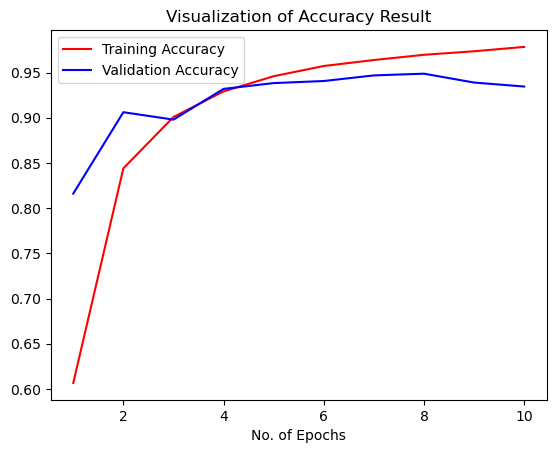

In [22]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation


In [23]:
class_name = validation_set.class_names


In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8815 files belonging to 19 classes.


In [25]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


8815/8815 [==============================] - 81s 9ms/step


In [26]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [27]:
Y_true


<tf.Tensor: shape=(8815,), dtype=int64, numpy=array([ 0,  0,  0, ..., 18, 18, 18])>

In [28]:
predicted_categories


<tf.Tensor: shape=(8815,), dtype=int64, numpy=array([ 1,  0,  0, ..., 18, 18, 18])>

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)


In [30]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.94       477
                            Corn_(maize)___healthy       1.00      0.99      1.00       465
                     Pepper,_bell___Bacterial_spot       0.94      0.97      0.95       478
                            Pepper,_bell___healthy       1.00      0.90      0.94       497
                             Potato___Early_blight       0.96      1.00      0.98       485
                              Potato___Late_blight       0.90      0.98      0.94       485
                                  Potato___healthy       0.95      0.97      0.96       456
                           Tomato___Bacterial_spot       0.93      0.99      0.